### Import Libraries

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

# Master Query from Database

In [ ]:
# connect to DB and query data needed for modeling

In [ ]:
# split data

# EDA on Training Data

### Load in Dataframes

In [23]:
documents_table= pd.read_csv('documents_table.csv')
documents_table.head()
documents_table.dtypes

doc_id                              int64
doc_type                           object
year                                int64
drug                               object
drug administration error           int64
                                    ...  
eosinophil percentage decreased     int64
supraventricular tachycardia        int64
radiation skin injury               int64
hypokalaemia                        int64
all_reactions                      object
Length: 929, dtype: object

### Investigate most common drugs, referenced in historical documents

#### insights
* need to remove some values like air, body, oxygen

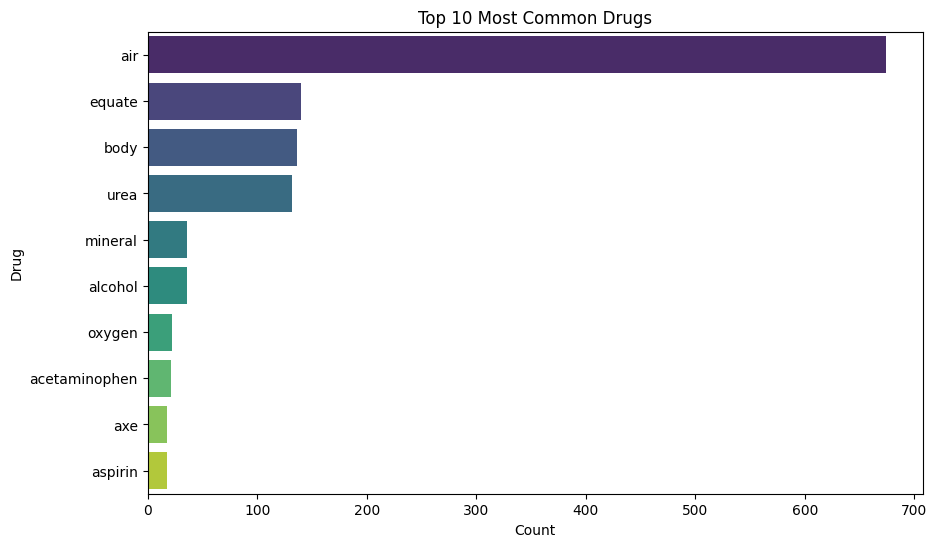

In [19]:
top_drugs = documents_table['drug'].value_counts().head(10)
top_drugs = top_drugs.reset_index().rename(columns={'index': 'drug', 'drug': 'count'})

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='drug', data=top_drugs, palette='viridis')
plt.title('Top 10 Most Common Drugs')
plt.xlabel('Count')
plt.ylabel('Drug')
plt.show()

### Investigate most common reactions, referenced in historical documents

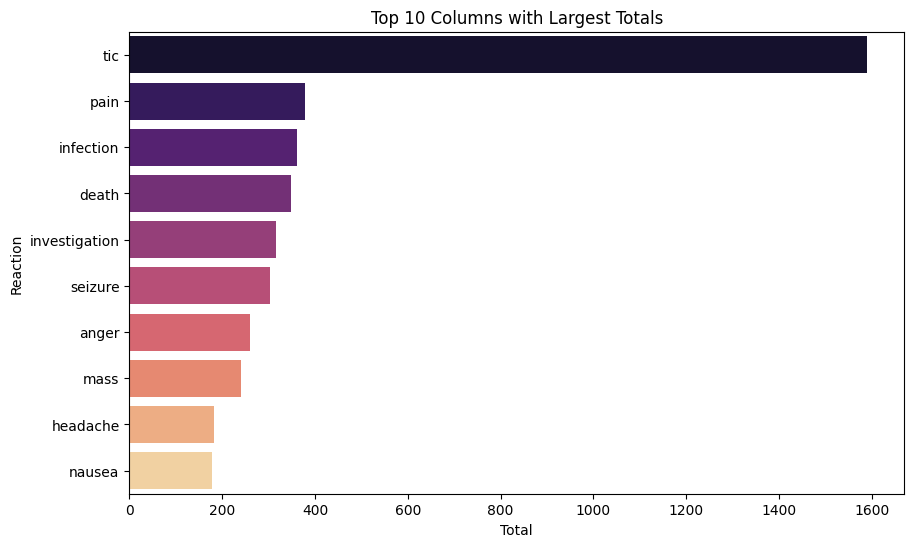

In [26]:
reaction_cols = documents_table.drop(columns=['doc_id','doc_type', 'year', 'drug', 'all_reactions']).sum()
top_reactions = reaction_cols.nlargest(10)


# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_reactions.values, y=top_reactions.index, palette='magma')
plt.title('Top 10 Columns with Largest Totals')
plt.xlabel('Total')
plt.ylabel('Reaction')
plt.show()

In [ ]:
documents_table.head()

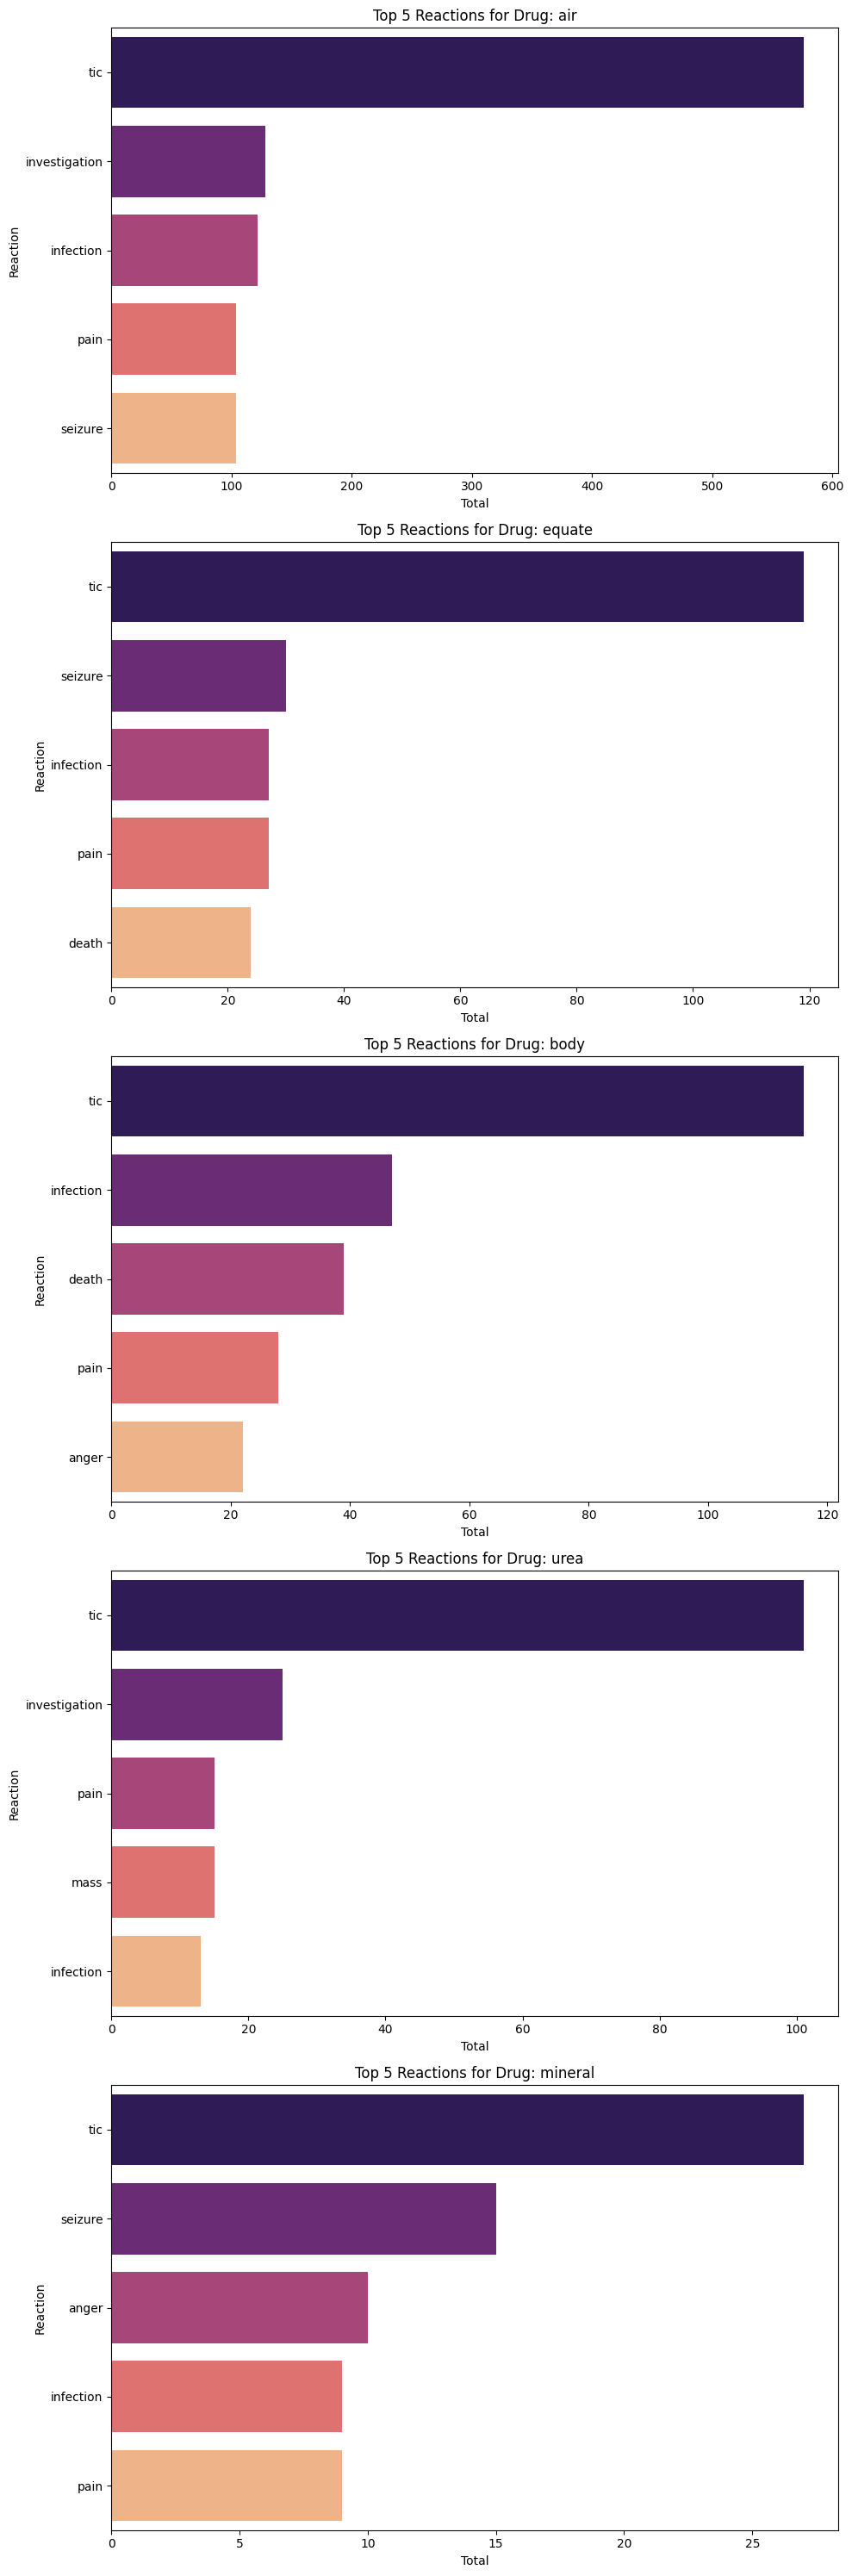

In [31]:

# Step 2: Filter documents_table to include only top 5 drugs
filtered_table = documents_table[documents_table['drug'].isin(top_drugs)]

# Step 3: Calculate top 5 reactions for each top drug
top_reactions_per_drug = {}
for drug in top_drugs:
    drug_data = filtered_table[filtered_table['drug'] == drug]
    reaction_counts = documents_table.drop(columns=['doc_id', 'doc_type', 'year', 'drug', 'all_reactions']).sum()
    top_reactions = reaction_counts.nlargest(5).index.tolist()
    top_reactions_per_drug[drug] = top_reactions

# Step 4: Create subplots for each drug
num_drugs = len(top_drugs)
fig, axes = plt.subplots(num_drugs, 1, figsize=(10, 6*num_drugs))

for i, drug in enumerate(top_drugs):
    ax = axes[i]
    drug_data = filtered_table[filtered_table['drug'] == drug]
    reaction_counts = drug_data.drop(columns=['doc_id', 'doc_type', 'year', 'drug','all_reactions']).sum()
    top_reactions = reaction_counts.nlargest(5)
    
    # Plotting
    sns.barplot(x=top_reactions.values, y=top_reactions.index, ax=ax, palette='magma')
    ax.set_title(f'Top 5 Reactions for Drug: {drug}')
    ax.set_xlabel('Total')
    ax.set_ylabel('Reaction')

plt.tight_layout()
plt.show()

# Reactions Table

## Outcome Variable

In [3]:
reactions = pd.read_csv('DataLibrary/reactions_table.csv')
reactions.head()

,patient_reaction_id,event_id,version_medDRA,outcome,reaction_processed
0,10,18,17.0,Recovered,['angioedema']
1,11,18,17.0,Recovered,"['laryngeal', 'oedema', 'laryngeal oedema']"
2,12,18,17.0,Recovered,"['face', 'oedema', 'face oedema']"
3,13,19,17.0,Fatal,"['tuberculosis', 'central', 'nervous', 'system..."
4,20,28,17.0,Recovered,"['respiratory', 'failure', 'respiratory failure']"


#### Graph

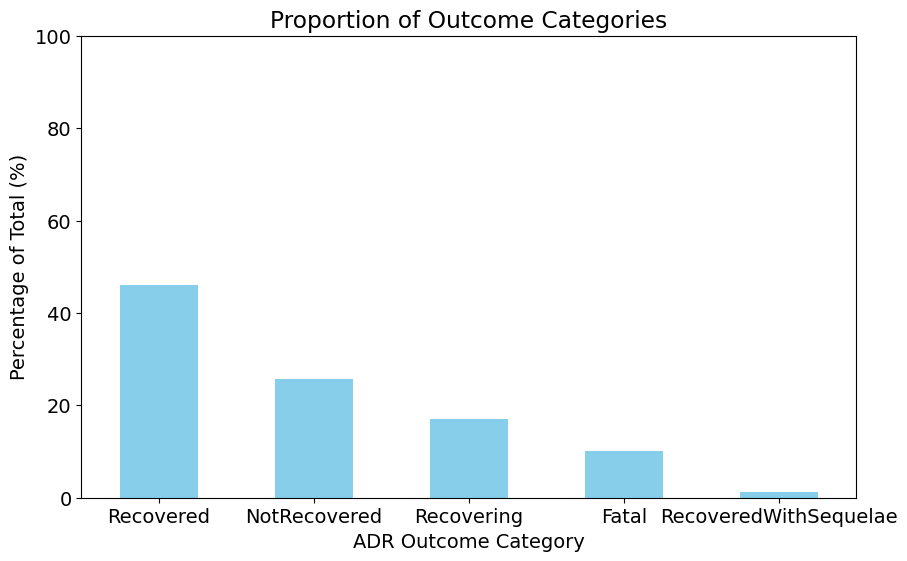

In [8]:
# Count the frequency of each category
category_counts = reactions['outcome'].value_counts()

# Calculate the percentages
total = len(reactions)
percentages = (category_counts / total) * 100

# Text size
plt.rcParams.update({'font.size': 14})

# Plotting the frequency bar plot
plt.figure(figsize=(10, 6))
bars = percentages.plot(kind='bar', color='skyblue')
plt.title('Proportion of Outcome Categories')
plt.xlabel('ADR Outcome Category')
plt.ylabel('Percentage of Total (%)')
plt.ylim(0, 100)
plt.xticks(rotation=0)

plt.show()

#### Descriptives

In [56]:
print(f"Frequency:", reactions['outcome'].value_counts()), print(f"Proportion:", reactions['outcome'].value_counts(normalize = True))

Frequency: outcome
Recovered                469
NotRecovered             261
Recovering               173
Fatal                    103
RecoveredWithSequelae     12
Name: count, dtype: int64
Proportion: outcome
Recovered                0.460707
NotRecovered             0.256385
Recovering               0.169941
Fatal                    0.101179
RecoveredWithSequelae    0.011788
Name: proportion, dtype: float64


(None, None)

### MeDRA Term Versions

#### Graph

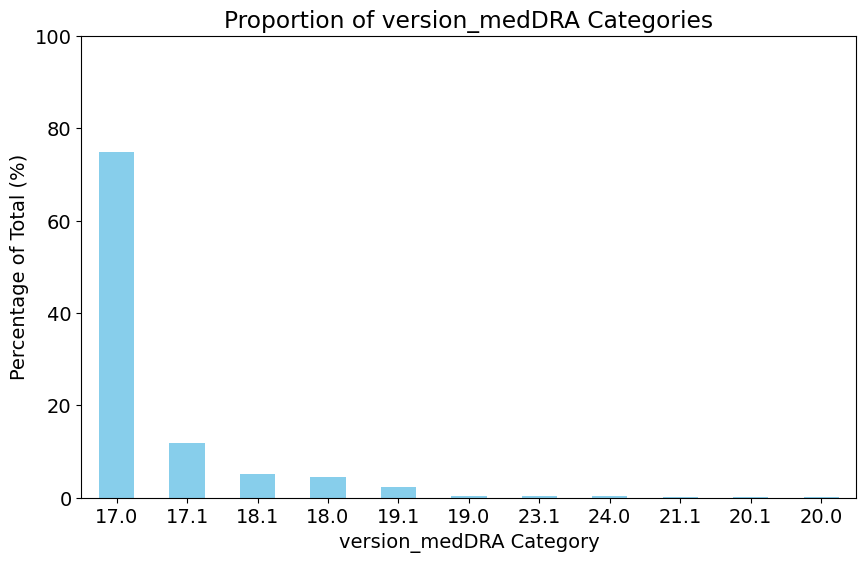

In [9]:
# Count the frequency of each category
category_counts = reactions['version_medDRA'].value_counts()

# Calculate the percentages
total = len(reactions)
percentages = (category_counts / total) * 100

# Text size
plt.rcParams.update({'font.size': 14})

# Plotting the frequency bar plot
plt.figure(figsize=(10, 6))
bars = percentages.plot(kind='bar', color='skyblue')
plt.title('Proportion of version_medDRA Categories')
plt.xlabel('version_medDRA Category')
plt.ylabel('Percentage of Total (%)')
plt.ylim(0, 100)
plt.xticks(rotation=0)

plt.show()

#### Descriptives

In [61]:
print(f"Frequency:", reactions['version_medDRA'].value_counts()), 
print(f"Proportion:", reactions['version_medDRA'].value_counts(normalize = True))

Frequency: version_medDRA
17.0    761
17.1    120
18.1     52
18.0     46
19.1     23
19.0      4
23.1      4
24.0      3
21.1      2
20.1      2
20.0      1
Name: count, dtype: int64
Proportion: version_medDRA
17.0    0.747544
17.1    0.117878
18.1    0.051081
18.0    0.045187
19.1    0.022593
19.0    0.003929
23.1    0.003929
24.0    0.002947
21.1    0.001965
20.1    0.001965
20.0    0.000982
Name: proportion, dtype: float64


### Processed Reaction Terms

In [97]:
# descriptive text stat function

# Events Table

In [10]:
# Update to query 
events = pd.read_csv('DataLibrary/events_table.csv')
events.head()

,event_id,safetyreportid,event_date,serious,fulfillexpeditecriteria,report_source,safetyreportversion,country,age,sex,reaction,drug,company_name
0,1,5801206-7,2009-01-09,1,1,3,NaN,cn,26.0,1,[{'reactionmeddrapt': 'DRUG ADMINISTRATION ERR...,"[{'drugcharacterization': '1', 'medicinalprodu...",NaN
1,5,10003304,2014-12-12,0,2,1,2.0,us,NaN,2,"[{'reactionmeddraversionpt': '17.0', 'reaction...","[{'drugcharacterization': '1', 'medicinalprodu...","['pfizer', 'inc']"
2,6,10003305,2014-10-02,0,2,1,1.0,us,48.0,2,"[{'reactionmeddraversionpt': '17.0', 'reaction...","[{'drugcharacterization': '1', 'medicinalprodu...","['pfizer', 'inc']"
3,8,10003307,2015-11-25,0,2,1,3.0,us,65.0,2,"[{'reactionmeddraversionpt': '18.1', 'reaction...","[{'drugcharacterization': '1', 'medicinalprodu...",['gilead']
4,9,10003308,2015-11-25,0,2,1,3.0,us,59.0,2,"[{'reactionmeddraversionpt': '18.1', 'reaction...","[{'drugcharacterization': '1', 'medicinalprodu...",['gilead']


In [11]:
events.shape

(757, 13)

### Age

#### Graph

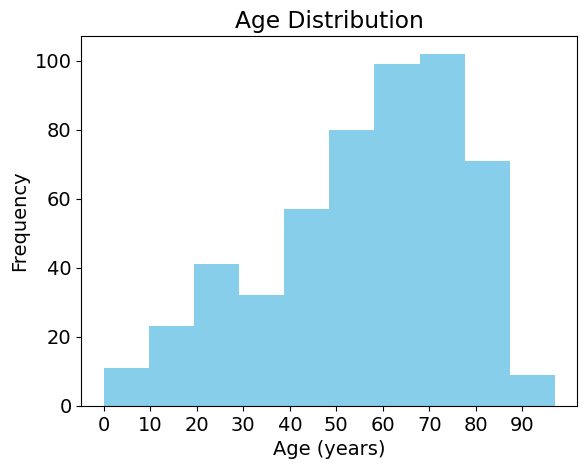

In [16]:
# Text size
plt.rcParams.update({'font.size': 14})

# Distribution of Age
plt.hist(events['age'].astype('float'), color = 'skyblue')
ticks = np.arange(0, 100, 10)  # Customize this range as needed
plt.xticks(ticks)
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

#### Descriptives

### Report Dates

#### Graph

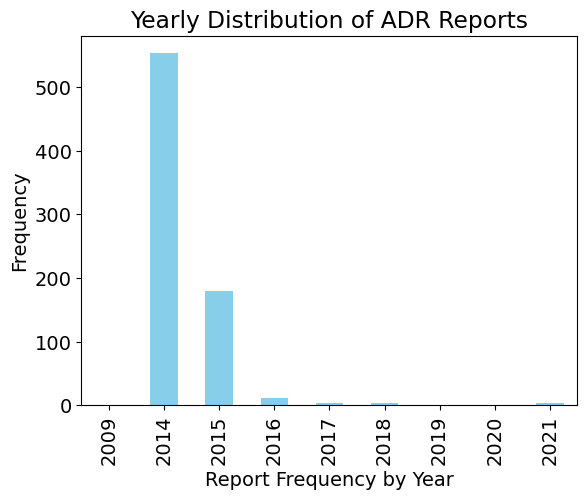

In [33]:
# Text size
plt.rcParams.update({'font.size': 14})

# Update variable type
events['event_graph'] = events['event_date'].astype("datetime64[ns]")

# Distribution of Reports
events['event_graph'].groupby([events["event_graph"].dt.year]).count().plot(kind="bar", color = "skyblue")
#ticks = np.arange(1968, 2025, 1)  # Customize this range as needed
#plt.xticks(ticks)
plt.xlabel('Report Frequency by Year')
plt.ylabel('Frequency')
plt.title('Yearly Distribution of ADR Reports')
plt.show()

#### Descriptives

### Seriousness of Report

#### Graph

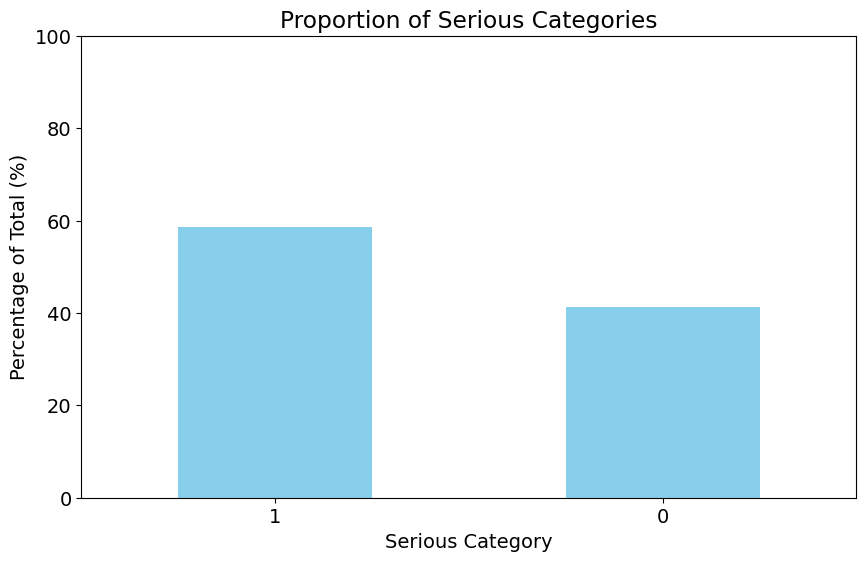

In [39]:
# Count the frequency of each category
category_counts = events['serious'].value_counts()

# Calculate the percentages
total = len(events)
percentages = (category_counts / total) * 100

# Text size
plt.rcParams.update({'font.size': 14})

# Plotting the frequency bar plot
plt.figure(figsize=(10, 6))
bars = percentages.plot(kind='bar', color='skyblue')
plt.title('Proportion of Serious Categories')
plt.xlabel('Serious Category')
plt.ylabel('Percentage of Total (%)')
plt.ylim(0, 100)
plt.xticks(rotation=0)

plt.show()

#### Descriptives

In [60]:
print(f"Frequency:", events['serious'].value_counts()), 
print(f"Proportion:", events['serious'].value_counts(normalize = True))

Frequency: serious
1    444
0    313
Name: count, dtype: int64
Proportion: serious
1    0.586526
0    0.413474
Name: proportion, dtype: float64


### Expedited Criteria Status

#### Graph

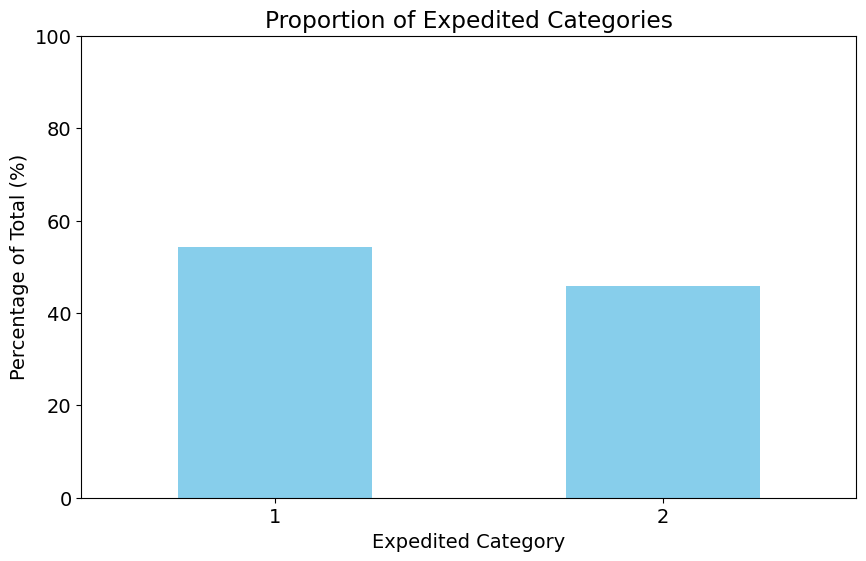

In [38]:
# Count the frequency of each category
category_counts = events['fulfillexpeditecriteria'].value_counts()

# Calculate the percentages
total = len(events)
percentages = (category_counts / total) * 100

# Text size
plt.rcParams.update({'font.size': 14})

# Plotting the frequency bar plot
plt.figure(figsize=(10, 6))
bars = percentages.plot(kind='bar', color='skyblue')
plt.title('Proportion of Expedited Categories')
plt.xlabel('Expedited Category')
plt.ylabel('Percentage of Total (%)')
plt.ylim(0, 100)
plt.xticks(rotation=0)

plt.show()

#### Descriptives

In [59]:
print(f"Frequency:", events['fulfillexpeditecriteria'].value_counts()), 
print(f"Proportion:", events['fulfillexpeditecriteria'].value_counts(normalize = True))

Frequency: fulfillexpeditecriteria
1    410
2    347
Name: count, dtype: int64
Proportion: fulfillexpeditecriteria
1    0.541612
2    0.458388
Name: proportion, dtype: float64


### Report Source

#### Graph

C:\Users\halee\AppData\Local\Temp\ipykernel_31580\2975813595.py:21: UserWarning: Legend does not support handles for int instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend(nums, labels)


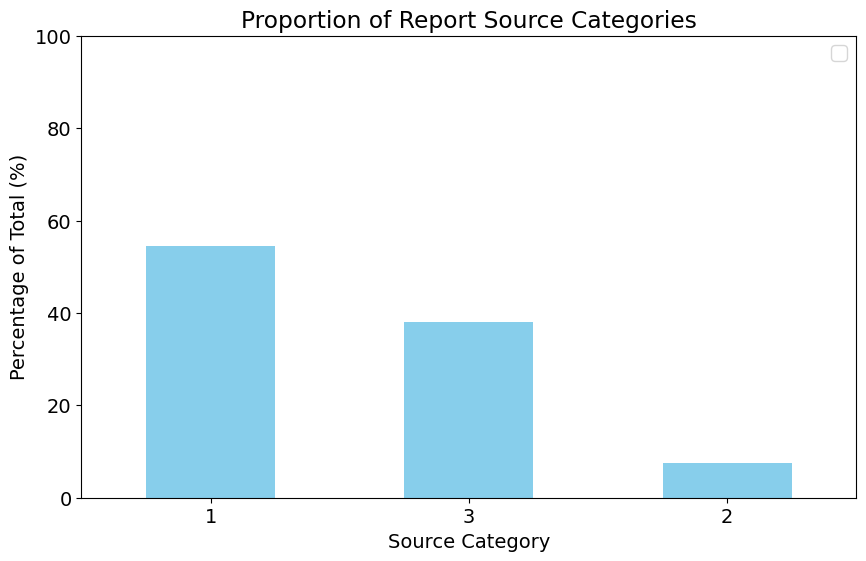

In [73]:
# Count the frequency of each category
category_counts = events['report_source'].value_counts()

# Calculate the percentages
total = len(events)
percentages = (category_counts / total) * 100

# Text size
plt.rcParams.update({'font.size': 14})

# Plotting the frequency bar plot
plt.figure(figsize=(10, 6))
bars = percentages.plot(kind='bar', color='skyblue')
plt.title('Proportion of Report Source Categories')
plt.xlabel('Source Category')
plt.ylabel('Percentage of Total (%)')
plt.ylim(0, 100)
plt.xticks(rotation=0)
#nums = [1,2,3]
#labels = ['Doc', 'Pharm', 'Other']
#plt.legend(nums, labels)
plt.show()

#### Descriptives

In [ ]:
print(f"Frequency:", events['report_source'].value_counts()), 
print(f"Proportion:", events['report_source'].value_counts(normalize = True))

### Company

#### Descriptives

In [75]:
print(f"Frequency:", events['company_name'].value_counts()), 
print(f"Proportion:", events['company_name'].value_counts(normalize = True))

Frequency: company_name
['gilead']                                135
['incyte', 'corporation']                 109
['pubhosp']                                95
['abbvie']                                 69
['pfizer', 'inc']                          47
['baxter']                                 40
['glaxosmithkline']                        39
['celgeneus']                              28
['jnjfoc']                                 22
['mylanlabs']                              21
['teva']                                   19
['bi', 'pharmaceuticals']                  15
['bayer']                                  15
['amgen']                                   8
['lundbeck']                                7
['bristol', 'myers', 'squibb']              6
['actelion']                                6
['roche']                                   5
['fri']                                     5
['sa', 'sa']                                5
['alexion']                                 3
['emd', 's

### Country 

#### Graph

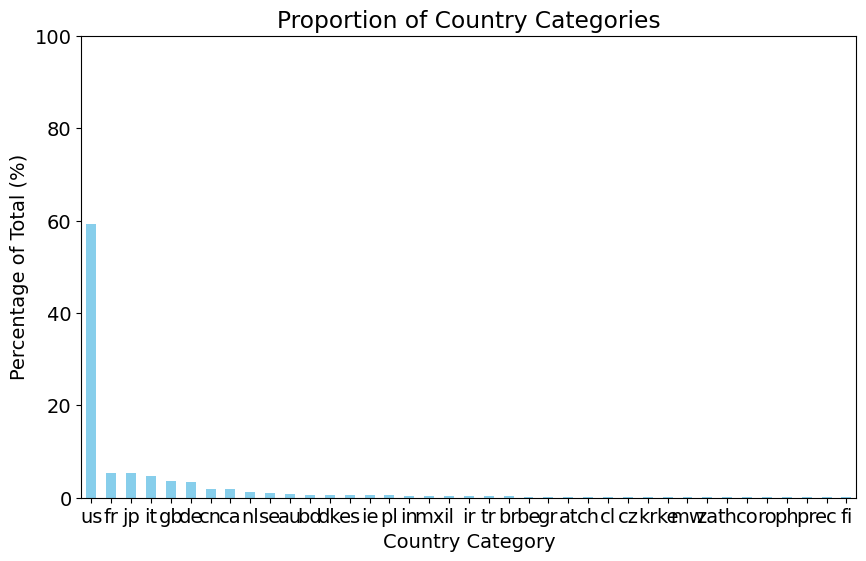

In [83]:
# Count the frequency of each category
category_counts = events['country'].value_counts()

# Calculate the percentages
total = len(events)
percentages = (category_counts / total) * 100

# Text size
plt.rcParams.update({'font.size': 14})

# Plotting the frequency bar plot
plt.figure(figsize=(10, 6))
bars = percentages.plot(kind='bar', color='skyblue')
plt.title('Proportion of Country Categories')
plt.xlabel('Country Category')
plt.ylabel('Percentage of Total (%)')
plt.ylim(0, 100)
plt.xticks(rotation=0)
#nums = [1,2,3]
#labels = ['Doc', 'Pharm', 'Other']
#plt.legend(nums, labels)
plt.show()

#### Descriptives

In [84]:
print(f"Frequency:", events['country'].value_counts()), 
print(f"Proportion:", events['country'].value_counts(normalize = True))

Frequency: country
us    449
fr     40
jp     40
it     35
gb     27
de     25
cn     15
ca     14
nl      9
se      7
au      6
bd      5
dk      5
es      5
ie      4
pl      4
in      3
mx      3
il      3
ir      3
tr      3
br      3
be      2
gr      2
at      2
ch      1
cl      1
cz      1
kr      1
ke      1
mw      1
za      1
th      1
co      1
ro      1
ph      1
pr      1
ec      1
fi      1
Name: count, dtype: int64
Proportion: country
us    0.616758
fr    0.054945
jp    0.054945
it    0.048077
gb    0.037088
de    0.034341
cn    0.020604
ca    0.019231
nl    0.012363
se    0.009615
au    0.008242
bd    0.006868
dk    0.006868
es    0.006868
ie    0.005495
pl    0.005495
in    0.004121
mx    0.004121
il    0.004121
ir    0.004121
tr    0.004121
br    0.004121
be    0.002747
gr    0.002747
at    0.002747
ch    0.001374
cl    0.001374
cz    0.001374
kr    0.001374
ke    0.001374
mw    0.001374
za    0.001374
th    0.001374
co    0.001374
ro    0.001374
ph    0.001374
pr   

### Sex

#### Graph

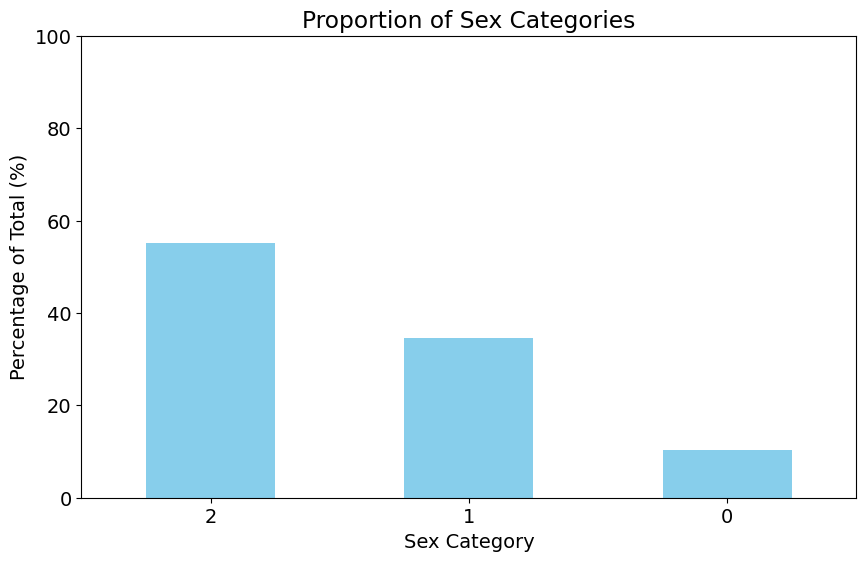

In [86]:
# Count the frequency of each category
category_counts = events['sex'].value_counts()

# Calculate the percentages
total = len(events)
percentages = (category_counts / total) * 100

# Text size
plt.rcParams.update({'font.size': 14})

# Plotting the frequency bar plot
plt.figure(figsize=(10, 6))
bars = percentages.plot(kind='bar', color='skyblue')
plt.title('Proportion of Sex Categories')
plt.xlabel('Sex Category')
plt.ylabel('Percentage of Total (%)')
plt.ylim(0, 100)
plt.xticks(rotation=0)
#nums = [1,2,3]
#labels = ['Doc', 'Pharm', 'Other']
#plt.legend(nums, labels)
plt.show()

#### Descriptives

In [85]:
print(f"Frequency:", events['sex'].value_counts()), 
print(f"Proportion:", events['sex'].value_counts(normalize = True))

Frequency: sex
2    417
1    262
0     78
Name: count, dtype: int64
Proportion: sex
2    0.550859
1    0.346103
0    0.103038
Name: proportion, dtype: float64


# Labels Table

In [87]:
# Update to query 
labels = pd.read_csv('DataLibrary/labels_table.csv')
labels.head()

,label_id,ndc,rxcui,label_date,ingredients,warnings,drug_names,purpose
0,1,['15631-0404'],NaN,2021-09-02,"['silicea', 'sucrose', 'silicon', 'dioxide', '...",NaN,"['dioxide', 'silicon dioxide', 'silicon', 'sil...","['us', 'temporary', 'relief', 'acne', 'boil', ..."
1,2,NaN,NaN,2015-01-09,"['chantecaille', 'protection', 'naturelle', 'b...",NaN,NaN,"['purpose', 'sunscreen', 'purpose sunscreen']"
2,3,NaN,NaN,2023-08-02,"['mezereum', 'daphne', 'bark', 'sucrose', 'lac...",NaN,NaN,"['us', 'relieve', 'symptom', 'itching', 'us re..."
3,4,NaN,NaN,2023-09-05,"['ofloxacin', 'sodium', 'chloride', 'hydrochlo...","['immature animal', '1800 dosage', 'obstructio...",NaN,NaN
4,5,['50090-0481'],['198014'],2023-04-03,"['naproxen', 'croscarmellose', 'sodium', 'povi...",NaN,['naproxen'],NaN


### Label Dates

#### Graph

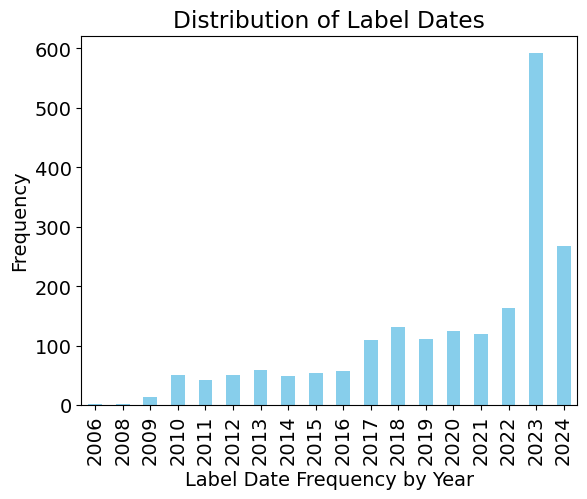

In [90]:
# Text size
plt.rcParams.update({'font.size': 14})

# Update variable type
labels['label_graph'] = labels['label_date'].astype("datetime64[ns]")

# Distribution of Reports
labels['label_date'].groupby([labels['label_graph'].dt.year]).count().plot(kind="bar", color = "skyblue")
#ticks = np.arange(1968, 2025, 1)  # Customize this range as needed
#plt.xticks(ticks)
plt.xlabel('Label Date Frequency by Year')
plt.ylabel('Frequency')
plt.title('Distribution of Label Dates')
plt.show()

#### Descriptives

### Ingredient List

In [ ]:
# descriptive text stat function

### Warnings

In [ ]:
# descriptive text stat function

### Drug Names

In [ ]:
# descriptive text stat function

# Patient Drugs Table

In [91]:
# Update to query 
drugs = pd.read_csv('DataLibrary/drugs_table.csv')
drugs.head()

,patient_drug_id,event_id,indication,med_product,generic_name,manufacturers,manu_num,product_type,rxcui,rxcui_num,unii
0,1,1,"['drug', 'abuse', 'drug abuse']","['duragesic', '100', 'duragesic 100']",NaN,NaN,0,NaN,NaN,0,NaN
1,2,5,NaN,"['doxycycline', 'hyclate', 'doxycycline hyclate']","['doxycycline', 'hyclate', 'doxyclycline', 'do...","['mayne-pharma-commercial-', 'actavis-pharma',...",31,"['human', 'prescription', 'drug', 'human presc...","['1653433', '2122343', '1650143', '1652674', '...",31,"['19XTS3T51U', 'N12000U13O', '8ZL07I20SB']"
2,3,5,NaN,"['tramadol', 'hydrochloride', 'tramadol hydroc...","['tramadol', 'hydrochloride', 'tramadol hydroc...","['amneal-pharmaceuticals-ny-', 'zydus-pharmace...",18,"['human', 'prescription', 'drug', 'human presc...","['835603', '2395808', '833709', '833711', '833...",17,['9N7R477WCK']
3,4,5,NaN,['oxycontin'],"['oxycodone', 'hydrochloride', 'oxycodone hydr...",['purdue-pharma-lp'],1,"['human', 'prescription', 'drug', 'human presc...","['1049504', '1049545', '1049565', '1049576', '...",14,['C1ENJ2TE6C']
4,5,5,NaN,['talwin'],NaN,NaN,0,NaN,NaN,0,NaN


### Medicinal Product

In [ ]:
# descriptive text stat function

### Manufacturers

### Unique Ingredient Identifiers

### Drug Characterization

# Prices Table

In [92]:
# Update to query 
prices = pd.read_csv('DataLibrary/prices_table.csv')
prices.head()

,price_id,ndc,unit_price,price_date,generic_brand,generic_price,generic_date
0,1,24385005452,0.28255,2022-12-21,1,NaN,NaN
1,2,70000047501,0.28255,2022-12-21,1,NaN,NaN
2,3,46122038576,0.78326,2022-12-21,1,NaN,NaN
3,4,70000036201,0.15365,2022-12-21,1,NaN,NaN
4,5,70000036202,0.15365,2022-12-21,1,NaN,NaN


### National Average Cost per Unit

#### Graph

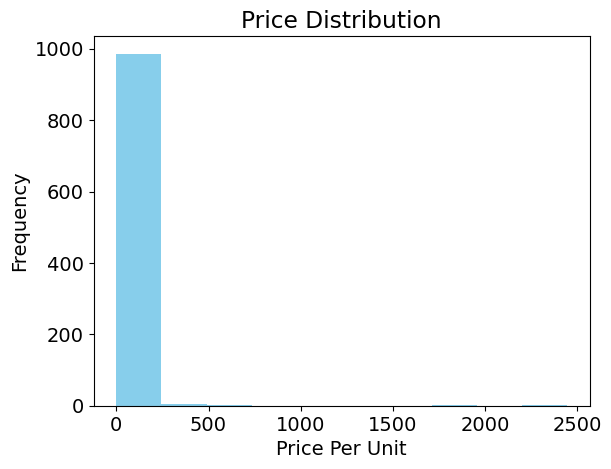

In [94]:
# Text size
plt.rcParams.update({'font.size': 14})

# Distribution of Age
plt.hist(prices['unit_price'].astype('float'), color = 'skyblue')
#ticks = np.arange(0, 100, 10)  # Customize this range as needed
#plt.xticks(ticks)
plt.xlabel('Price Per Unit')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

#### Descriptives

### Effective Price Dates

### Drug Type

#### Graph

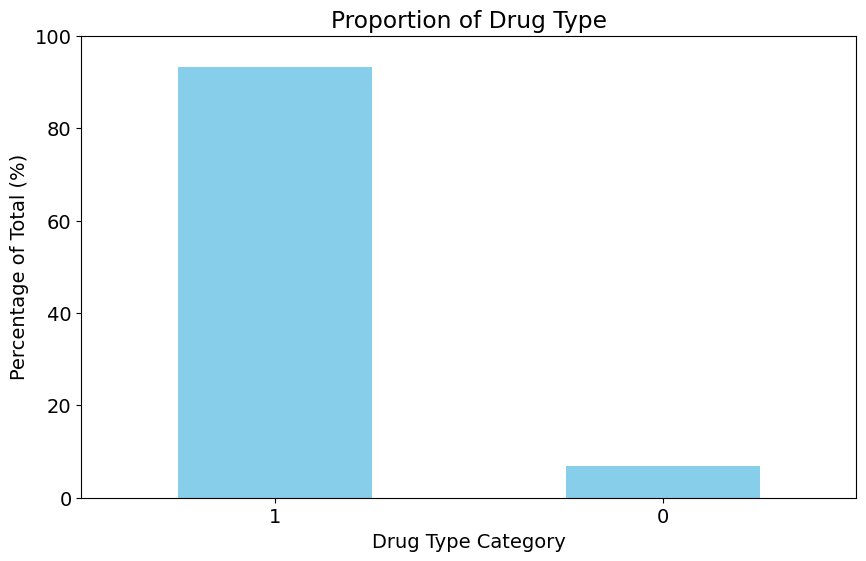

In [95]:
# Count the frequency of each category
category_counts = prices['generic_brand'].value_counts()

# Calculate the percentages
total = len(prices)
percentages = (category_counts / total) * 100

# Text size
plt.rcParams.update({'font.size': 14})

# Plotting the frequency bar plot
plt.figure(figsize=(10, 6))
bars = percentages.plot(kind='bar', color='skyblue')
plt.title('Proportion of Drug Type')
plt.xlabel('Drug Type Category')
plt.ylabel('Percentage of Total (%)')
plt.ylim(0, 100)
plt.xticks(rotation=0)
#nums = [1,0]
#labels = ['Generic', 'Brand']
#plt.legend(nums, labels)
plt.show()

#### Descriptives

In [96]:
print(f"Frequency:", prices['generic_brand'].value_counts()), 
print(f"Proportion:", prices['generic_brand'].value_counts(normalize = True))

Frequency: generic_brand
1    932
0     68
Name: count, dtype: int64
Proportion: generic_brand
1    0.932
0    0.068
Name: proportion, dtype: float64


# Manufacturer Table

# Combined Dataset from Master Query
## Analyzing Variable Interactions and Patterns

### All Numerical Variables

#### Correlation Martix

In [ ]:
# matrix

#### Age x. Outcome

#### Prices x. Outcome

#### Number of Manufacturers x. Outcome

### All Text Variables

In [17]:
# top token - naive bayes processing and/or tf-idf properties by outcome

### All Categorical Variables

#### Sex x. Outcome

#### Expedited Status x. Outcome

#### Report Source x. Outcome

#### Company Making Report x. Outcome

#### Country x. Outcome

#### Product Type x. Outcome

#### Manufacturer x. Outcome